Name: Vaibhav Chattree;
Email: vavo900@gmail.com;
Project: Learning Hope;


## Predicting Project Approval on DonorsChoose.org
---
> The DonorsChoose.org portal receives a staggering number of classroom project proposals (hundreds of thousands!) each year. Manually reviewing each one by a large volunteer force is becoming unsustainable.

The **objective** is to streamline the screening process and ensure all proposals receive a fair and consistent review. This will help in freeing up volunteer time to focus on proposals that require more hands-on guidance.


---




***This is where you come in!***  

**Problem Statement ->** Your goal is to develop a system that predicts project approval based on the teacher's description, along with other details about the project, teacher, and school.


**Steps**
1. Data Collection, Exploration and Preprocessing
2. EDA
3. Pre-Modelling Data Preparation
4. Model Building
5. Model Evaluation
6. Summary



---



## Data Collection, Exploration and Preprocessing

In [ ]:
# ## 1. Data Collection

# ### Import Libraries
# Import the necessary libraries for loading data and data manipulation

import os
import gdown
import zipfile
import pandas as pd
import numpy as np

# ### Download Dataset
# The dataset can be downloaded using the provided code. The data will be extracted into a specified directory.
dataset_url = "https://drive.google.com/uc?export=download&id=1KrnpfYRKVxGDnj-R2VZmNscEkR1zr2-4"
dataset_path = "./dataset/donors_choose" # the dataset will be downloaded in this folder
zip_file_path = os.path.join(dataset_path, "donors_choose_dataset.zip")

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
if not os.path.exists(zip_file_path):
    gdown.download(dataset_url, zip_file_path, quiet=False)
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(dataset_path)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1KrnpfYRKVxGDnj-R2VZmNscEkR1zr2-4
From (redirected): https://drive.google.com/uc?export=download&id=1KrnpfYRKVxGDnj-R2VZmNscEkR1zr2-4&confirm=t&uuid=bd85f981-3ef2-4acc-9de4-8b370cefe0a6
To: /content/dataset/donors_choose/donors_choose_dataset.zip
100%|██████████| 111M/111M [00:00<00:00, 194MB/s]


---


### **Accessing the dataset**
To access the dataset, open the **Files** section by clicking the folder icon on the left pane; it should display the label 'Files' when you hover over it.

> Within the Files section, you will find a folder named dataset. Inside this folder, there is another folder called *donors_choose*.

> Within the donors_choose folder, you will find two CSV files:
1. train_data.csv
2. resources.csv

These two CSV files make up the dataset.

In [ ]:
# First, load the two CSV files into separate dataframes using pandas.
# Type your code below.

train_df = pd.read_csv('dataset/donors_choose/train_data.csv')
resources_df = pd.read_csv('dataset/donors_choose/resources.csv')

train_df.head(), resources_df.head()

(   Unnamed: 0       id                        teacher_id teacher_prefix  \
 0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
 1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
 2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
 3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
 4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
 
   school_state project_submitted_datetime project_grade_category  \
 0           IN        2016-12-05 13:43:57          Grades PreK-2   
 1           FL        2016-10-25 09:22:10             Grades 6-8   
 2           AZ        2016-08-31 12:03:56             Grades 6-8   
 3           KY        2016-10-06 21:16:17          Grades PreK-2   
 4           TX        2016-07-11 01:10:09          Grades PreK-2   
 
             project_subject_categories     project_subject_subcategories  \
 0                  Literacy & Language          

Provide a summary of each dataframe, including its size, features, target variable, and data types.

In [ ]:

print("Train DataFrame Summary")
print("Shape:", train_df.shape)
print("Columns:", train_df.columns.tolist())
print("Data Types:\n", train_df.dtypes)

print("\nResources DataFrame Summary")
print("Shape:", resources_df.shape)
print("Columns:", resources_df.columns.tolist())
print("Data Types:\n", resources_df.dtypes)

Train DataFrame Summary
Shape: (109248, 17)
Columns: ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'project_submitted_datetime', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved']
Data Types:
 Unnamed: 0                                       int64
id                                              object
teacher_id                                      object
teacher_prefix                                  object
school_state                                    object
project_submitted_datetime                      object
project_grade_category                          object
project_subject_categories                      object
project_subject_subcategories                   object
project_title                                   object
proj

#### **Understanding the Dataset**

1.   List item

1.   List item

1.   List item
2.   List item


2.   List item


2.   List item


We have included some additional information below to help you understand better.

The `train.csv` data set provided by DonorsChoose contains the following features -->

Feature | Description
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul>
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul>
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul>
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup>
**`project_essay_3`**    | Third application essay<sup>*</sup>
**`project_essay_4`**    | Fourth application essay<sup>*</sup>
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2`



---

**Notes on the Essay Data**

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>



---


Additionally, the `resources.csv` data set provides more data about the resources required for each project.

Feature | Description
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required (each unit). **Example:** `9.95`   

---


#### **To predict (Output/Target Feature)**
The `train.csv` contains the following column (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.


In [ ]:

data_types = train_df.dtypes

null_values = train_df.isnull().sum()

train_df_summary = pd.DataFrame({
    'Data Type': data_types,
    'Null Values': null_values
})

train_df_summary

,Data Type,Null Values
Unnamed: 0,int64,0
id,object,0
teacher_id,object,0
teacher_prefix,object,3
school_state,object,0
project_submitted_datetime,object,0
project_grade_category,object,0
project_subject_categories,object,0
project_subject_subcategories,object,0
project_title,object,0


In [ ]:

train_df_shape = train_df.shape
print("Shape of train_df:", train_df_shape)

Shape of train_df: (109248, 17)


In [ ]:


resources_data_types = resources_df.dtypes

resources_null_values = resources_df.isnull().sum()

resources_df_summary = pd.DataFrame({
    'Data Type': resources_data_types,
    'Null Values': resources_null_values
})

resources_df_summary

,Data Type,Null Values
id,object,0
description,object,292
quantity,int64,0
price,float64,0


In [ ]:

resources_df_shape = resources_df.shape
print("Shape of resources_df:", resources_df_shape)

Shape of resources_df: (1541272, 4)


In [ ]:
if 'id' not in train_df.columns or 'id' not in resources_df.columns:
    raise ValueError("One or both dataframes do not contain the 'id' column.")

train_ids = train_df['id'].unique()
resources_ids = resources_df['id'].unique()

train_ids_set = set(train_ids)
resources_ids_set = set(resources_ids)

train_in_resources = train_ids_set.issubset(resources_ids_set)
resources_in_train = resources_ids_set.issubset(train_ids_set)

mismatched_train_ids = train_ids_set - resources_ids_set
mismatched_resources_ids = resources_ids_set - train_ids_set

ids_are_equal = train_ids_set == resources_ids_set

train_in_resources, resources_in_train, ids_are_equal, mismatched_train_ids, mismatched_resources_ids

(True,
 False,
 False,
 set(),
 {'p036778',
  'p116032',
  'p200841',
  'p232086',
  'p050965',
  'p005217',
  'p046086',
  'p229613',
  'p200685',
  'p004144',
  'p025639',
  'p157745',
  'p036011',
  'p219323',
  'p177500',
  'p204217',
  'p240646',
  'p059412',
  'p084991',
  'p100586',
  'p158871',
  'p046105',
  'p077205',
  'p204340',
  'p033869',
  'p164202',
  'p234992',
  'p234250',
  'p050311',
  'p183348',
  'p044032',
  'p036499',
  'p224039',
  'p071950',
  'p160001',
  'p155543',
  'p153349',
  'p219572',
  'p052007',
  'p124080',
  'p173824',
  'p172893',
  'p243908',
  'p100475',
  'p158650',
  'p159782',
  'p184798',
  'p234119',
  'p065422',
  'p143229',
  'p050117',
  'p219525',
  'p083581',
  'p112062',
  'p220357',
  'p115272',
  'p163573',
  'p028193',
  'p002384',
  'p090438',
  'p010814',
  'p048699',
  'p250730',
  'p194920',
  'p131173',
  'p250541',
  'p088277',
  'p178860',
  'p206809',
  'p171441',
  'p079059',
  'p175130',
  'p069976',
  'p198844',
  'p242

**Observations**

*Document your observations for the analysis done till now around missing values, data types and data consistency*

-
-
-

#### Creating the Master Dataframe - project_data

Before proceeding with doing the data sanity checks as documented above, you need to combine the two dataframes train_df into a single dataframe by merging them on the `project-ids`

> **Note:** Each line in the resources.csv file represents a resource required by a project. Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project. Also the `price` column denotes the price per unit of the item denoted by the `description` column

##### Perform these steps to complete this task:
- Using the `resources_df`,  create a new dataframe that contains the project_id, total quantity of resources for each project and total amount required for all the resources for that project.
- Merge this new dataframe with the `train_df` dataframe. Peform an inner join.
- Name this dataframe as `project_data`

In [ ]:

resources_agg = resources_df.groupby('id').agg(
    total_quantity=('quantity', 'sum'),
    total_amount=('price', lambda x: sum(x * resources_df.loc[x.index, 'quantity']))
).reset_index()

project_data = pd.merge(train_df, resources_agg, on='id', how='inner')

project_data_head = project_data.head()
project_data_head

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total_quantity,total_amount
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,23,596.36
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,1,299.00
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,22,686.68
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,4,431.90
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,4,143.96


***Checklist***

Before proceeding further, check
- the shape of `project_data`. There should be around 100k rows and 17-18 columns
- the datatypes of all the variables, most should be object datatype with a few numeric columns
- the columns containing null values, should be around 3 columns

In [ ]:

project_data_shape = project_data.shape

project_data_dtypes = project_data.dtypes

project_data_nulls = project_data.isnull().sum()
columns_with_nulls = project_data_nulls[project_data_nulls > 0]

project_data_shape, project_data_dtypes, columns_with_nulls

((109248, 19),
 Unnamed: 0                                        int64
 id                                               object
 teacher_id                                       object
 teacher_prefix                                   object
 school_state                                     object
 project_submitted_datetime                       object
 project_grade_category                           object
 project_subject_categories                       object
 project_subject_subcategories                    object
 project_title                                    object
 project_essay_1                                  object
 project_essay_2                                  object
 project_essay_3                                  object
 project_essay_4                                  object
 project_resource_summary                         object
 teacher_number_of_previously_posted_projects      int64
 project_is_approved                               int64
 total_quantity 

Once the checks are done, proceed further

#### Missing Value Treatment

**project_essay columns**

Some of the `project_essay_*` columns contain null values. Revisit the `Understanding the Data` section to understand why this is so

In [ ]:

project_data['project_essay_combined'] = (
    project_data['project_essay_1'].fillna('') +
    ' ' + project_data['project_essay_2'].fillna('') +
    ' ' + project_data['project_essay_3'].fillna('') +
    ' ' + project_data['project_essay_4'].fillna('')
)

project_data.drop(columns=['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4'], inplace=True)

project_data_combined_head = project_data.head()
project_data_combined_head

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total_quantity,total_amount,project_essay_combined
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,23,596.36,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,1,299.00,Our students arrive to our school eager to lea...
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",1,0,22,686.68,"\r\n\""True champions aren't always the ones th..."
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,My students need to engage in Reading and Math...,4,1,4,431.90,I work at a unique school filled with both ESL...
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,1,1,4,143.96,Our second grade classroom next year will be m...


**teacher_prefix** column

`teacher_prefix` has a few missing values. Develop a suitable strategy to fix this

In [ ]:

mode_teacher_prefix = project_data['teacher_prefix'].mode()[0]

project_data['teacher_prefix'].fillna(mode_teacher_prefix, inplace=True)

project_data_teacher_prefix_head = project_data.head()
project_data_teacher_prefix_head

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total_quantity,total_amount,project_essay_combined
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,23,596.36,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,1,299.00,Our students arrive to our school eager to lea...
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",1,0,22,686.68,"\r\n\""True champions aren't always the ones th..."
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,My students need to engage in Reading and Math...,4,1,4,431.90,I work at a unique school filled with both ESL...
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,1,1,4,143.96,Our second grade classroom next year will be m...


***Checklist***

Before proceeding further, check
- null values in the dataframe. There should be none
- first few rows of the dataframe for inspection purpose

In [ ]:

null_values_check = project_data.isnull().sum()

project_data_inspection_head = project_data.head()

null_values_check, project_data_inspection_head

(Unnamed: 0                                      0
 id                                              0
 teacher_id                                      0
 teacher_prefix                                  0
 school_state                                    0
 project_submitted_datetime                      0
 project_grade_category                          0
 project_subject_categories                      0
 project_subject_subcategories                   0
 project_title                                   0
 project_resource_summary                        0
 teacher_number_of_previously_posted_projects    0
 project_is_approved                             0
 total_quantity                                  0
 total_amount                                    0
 project_essay_combined                          0
 dtype: int64,
    Unnamed: 0       id                        teacher_id teacher_prefix  \
 0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
 1      140945  p

With this the first section of the code notebook is now completed. Now, let's proceed to the next section on Exploratory Data Analysis or EDA

## EDA (Exploratory Data Analysis)

For this section, you have to compute various univariate and bivariate analysis for the different columns of interest in the `project_data` dataframe.
You have the freedom to do as much analysis as possible. However, for the sake of brevity, we are suggesting the following tasks

**EDA-1**: What is the percentage (fraction) and number of projects that are approved versus not approved? Create a visualization of the results.

Number of Projects Approved vs Not Approved:
project_is_approved
1    92706
0    16542
Name: count, dtype: int64

Percentage of Projects Approved vs Not Approved:
project_is_approved
1    84.858304
0    15.141696
Name: proportion, dtype: float64


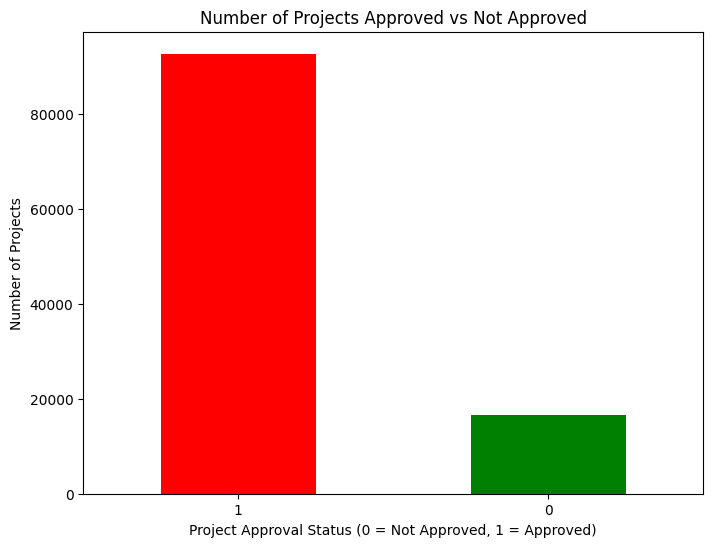

In [ ]:

import matplotlib.pyplot as plt

approval_counts = project_data['project_is_approved'].value_counts()
approval_percentages = project_data['project_is_approved'].value_counts(normalize=True) * 100

print("Number of Projects Approved vs Not Approved:")
print(approval_counts)
print("\nPercentage of Projects Approved vs Not Approved:")
print(approval_percentages)

plt.figure(figsize=(8, 6))
approval_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Number of Projects Approved vs Not Approved')
plt.xlabel('Project Approval Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Number of Projects')
plt.xticks(rotation=0)
plt.show()

**EDA-2**: Analyse the approval rate per state. *You can also plot the approval rates for the top k states*.

<ipython-input-16-b31964e8ffa8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_k_states.values, y=top_k_states.index, palette="viridis")


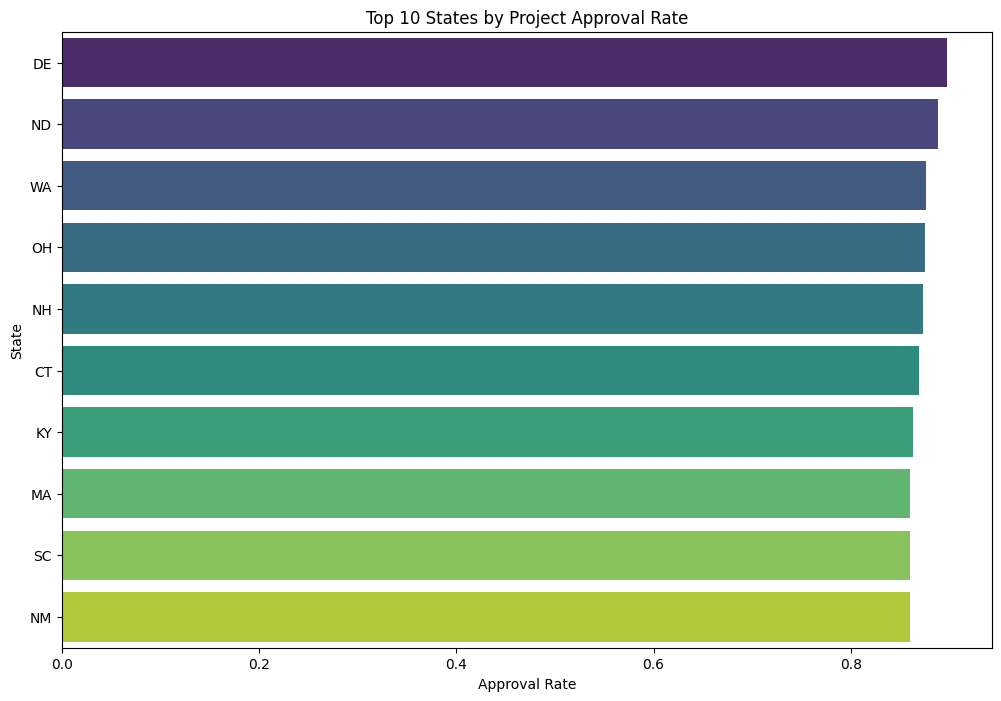

In [ ]:

import seaborn as sns

approval_rate_per_state = project_data.groupby('school_state')['project_is_approved'].mean().sort_values(ascending=False)

k = 10  # You can adjust this value to see more or fewer states

top_k_states = approval_rate_per_state.head(k)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_k_states.values, y=top_k_states.index, palette="viridis")
plt.title(f'Top {k} States by Project Approval Rate')
plt.xlabel('Approval Rate')
plt.ylabel('State')
plt.show()

**EDA-3**: Analyse the approval rate per project_grade_category using stacked bar chart

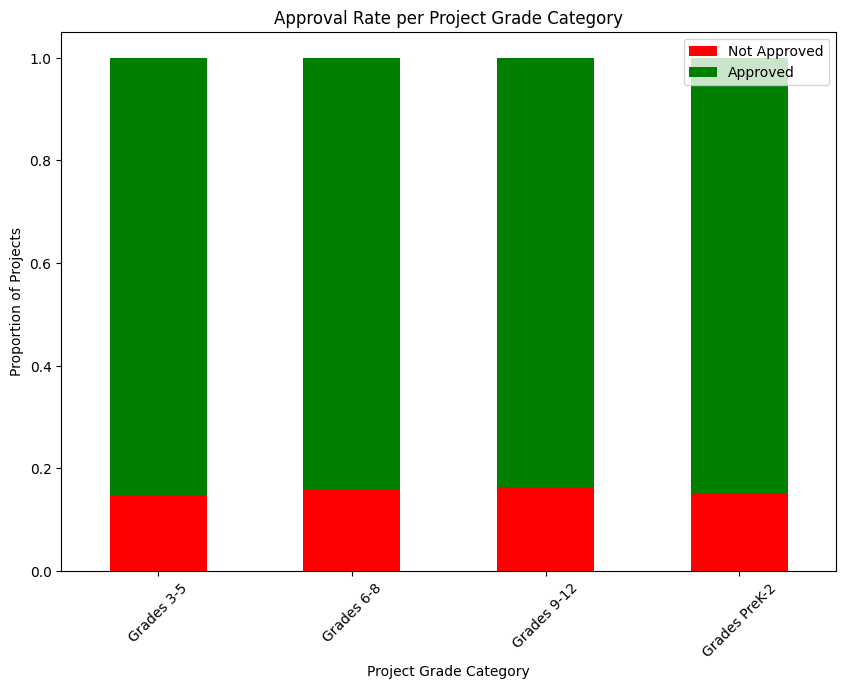

In [ ]:

import pandas as pd

grade_approval_counts = project_data.groupby(['project_grade_category', 'project_is_approved']).size().unstack()

grade_approval_rates = grade_approval_counts.div(grade_approval_counts.sum(axis=1), axis=0)

grade_approval_rates.plot(kind='bar', stacked=True, figsize=(10, 7), color=['red', 'green'])

plt.title('Approval Rate per Project Grade Category')
plt.xlabel('Project Grade Category')
plt.ylabel('Proportion of Projects')
plt.legend(['Not Approved', 'Approved'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

**EDA-4**: Analyse the approval rate per project_subject_categories.
- Is the approval rate same for all categories?
- Do all categories have almost equal representation?
- Any skewness observed?

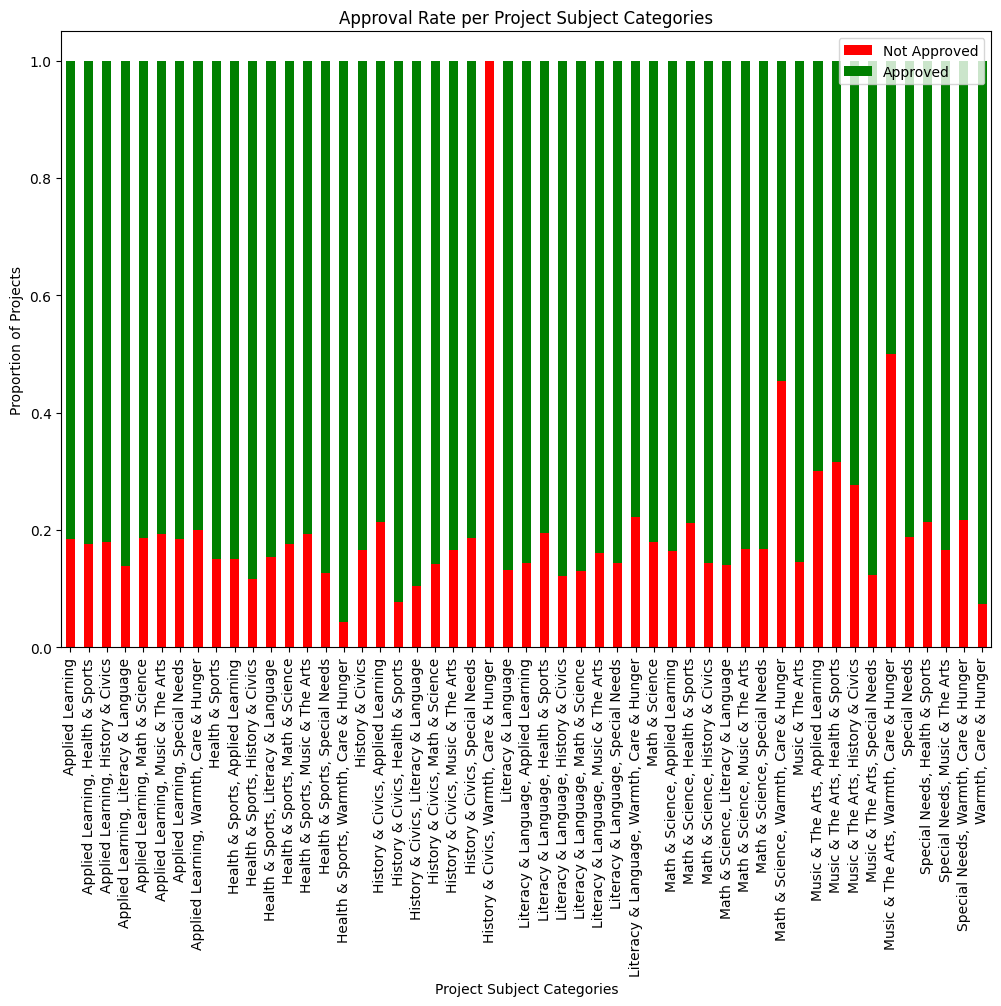

,Total Projects,Approval Rate
project_subject_categories,,
Literacy & Language,23655,0.867470
Math & Science,17072,0.819529
"Literacy & Language, Math & Science",14636,0.869432
Health & Sports,10177,0.848973
Music & The Arts,5180,0.855019
Special Needs,4226,0.811879
"Literacy & Language, Special Needs",3961,0.855592
Applied Learning,3771,0.814638
"Math & Science, Literacy & Language",2289,0.859764


In [ ]:

subject_approval_counts = project_data.groupby(['project_subject_categories', 'project_is_approved']).size().unstack()

subject_approval_rates = subject_approval_counts.div(subject_approval_counts.sum(axis=1), axis=0)

subject_total_counts = project_data['project_subject_categories'].value_counts()

subject_approval_rates.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])

plt.title('Approval Rate per Project Subject Categories')
plt.xlabel('Project Subject Categories')
plt.ylabel('Proportion of Projects')
plt.legend(['Not Approved', 'Approved'], loc='upper right')
plt.xticks(rotation=90)
plt.show()

subject_approval_summary = pd.DataFrame({
    'Total Projects': subject_total_counts,
    'Approval Rate': subject_approval_rates[1]
}).sort_values(by='Total Projects', ascending=False)

subject_approval_summary

**EDA-5**: Is there any gender bias for approval?
  - Use the teacher_prefix column.

<Figure size 800x600 with 0 Axes>

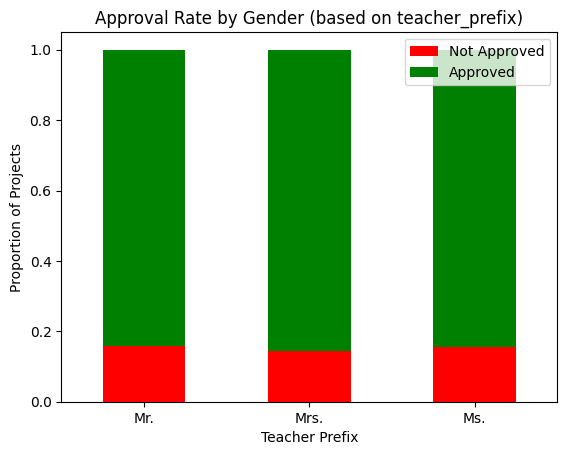

,Total Projects,Approval Rate
teacher_prefix,,
Mr.,10648,0.841473
Mrs.,57272,0.855566
Ms.,38955,0.843537


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

gender_prefixes = ['Mr.', 'Mrs.', 'Ms.']
project_data_gender = project_data[project_data['teacher_prefix'].isin(gender_prefixes)]

gender_approval_counts = project_data_gender.groupby(['teacher_prefix', 'project_is_approved']).size().unstack()

gender_approval_rates = gender_approval_counts.div(gender_approval_counts.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
gender_approval_rates.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('Approval Rate by Gender (based on teacher_prefix)')
plt.xlabel('Teacher Prefix')
plt.ylabel('Proportion of Projects')
plt.legend(['Not Approved', 'Approved'], loc='upper right')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

gender_approval_summary = pd.DataFrame({
    'Total Projects': project_data_gender['teacher_prefix'].value_counts(),
    'Approval Rate': gender_approval_rates[1]  # 1 represents approved projects
})

gender_approval_summary

**EDA-6**: Check whether the approval rate depends on the amount and quantity of the resources?
- Provide descriptive statstics for approved & not-approved projects.
- with appropriate visualizations for a better understanding of the results

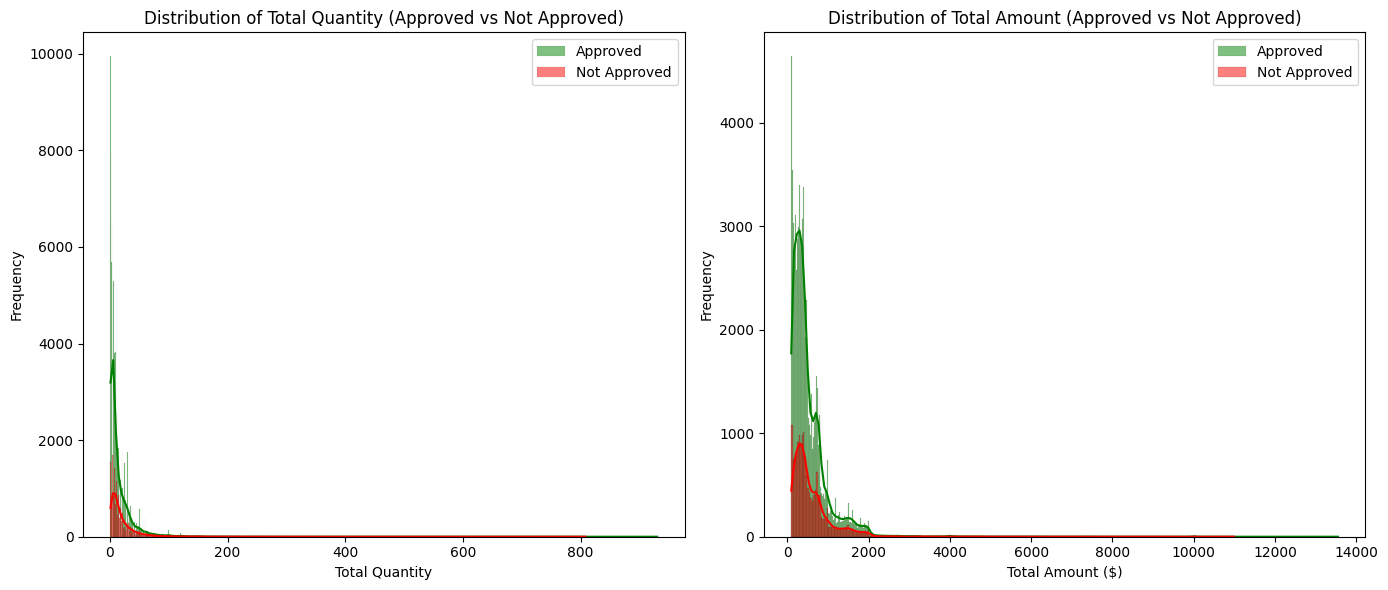

(       total_quantity  total_amount
 count    92706.000000  92706.000000
 mean        16.390223    537.489913
 std         25.592556    543.081743
 min          1.000000    100.000000
 25%          3.000000    240.482500
 50%          8.000000    391.440000
 75%         20.000000    679.080000
 max        930.000000  13543.820000,
        total_quantity  total_amount
 count    16542.000000  16542.000000
 mean        20.190243    590.922012
 std         29.062878    565.254646
 min          1.000000    100.000000
 25%          6.000000    273.905000
 50%         12.000000    428.360000
 75%         24.000000    734.887500
 max        808.000000  10987.060000)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

approved_projects = project_data[project_data['project_is_approved'] == 1]
not_approved_projects = project_data[project_data['project_is_approved'] == 0]

approved_stats = approved_projects[['total_quantity', 'total_amount']].describe()
not_approved_stats = not_approved_projects[['total_quantity', 'total_amount']].describe()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(approved_projects['total_quantity'], color='green', label='Approved', kde=True)
sns.histplot(not_approved_projects['total_quantity'], color='red', label='Not Approved', kde=True)
plt.title('Distribution of Total Quantity (Approved vs Not Approved)')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(approved_projects['total_amount'], color='green', label='Approved', kde=True)
sns.histplot(not_approved_projects['total_amount'], color='red', label='Not Approved', kde=True)
plt.title('Distribution of Total Amount (Approved vs Not Approved)')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

approved_stats, not_approved_stats

**EDA-7**: Conduct further analysis to uncover patterns, anomalies, and relationships within the data.
- Summary statistics
- Distribution plots
- Correlation matrix (for numerical features)
- how approval rate changes across the different features

<ipython-input-21-72ff9c9bfe3b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='project_is_approved', data=project_data, palette='Set2')


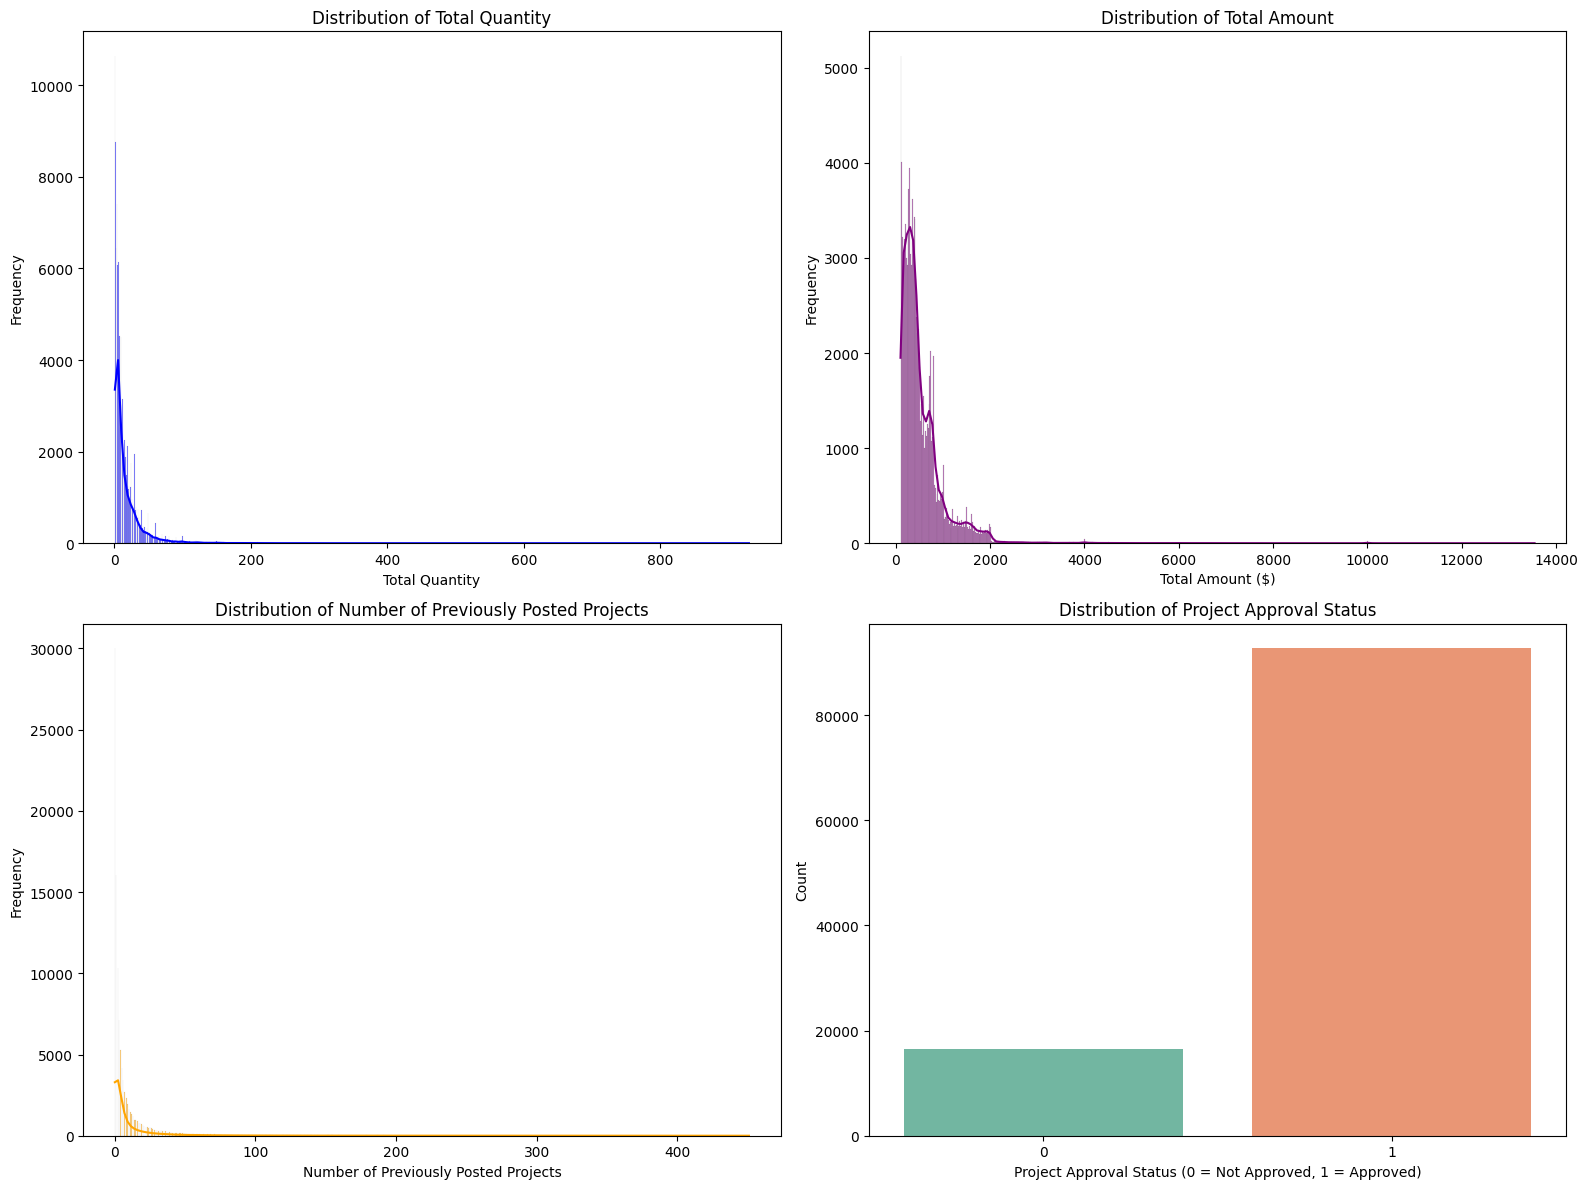

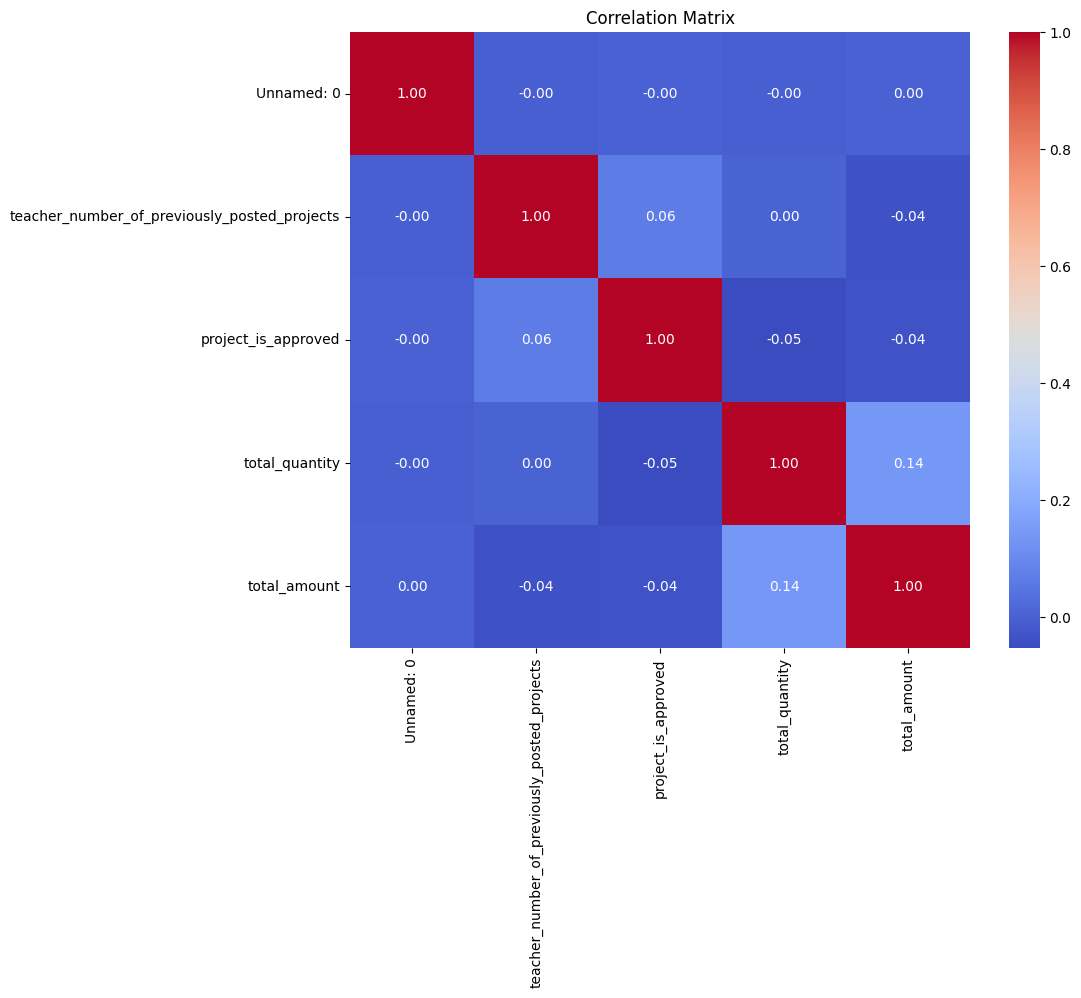

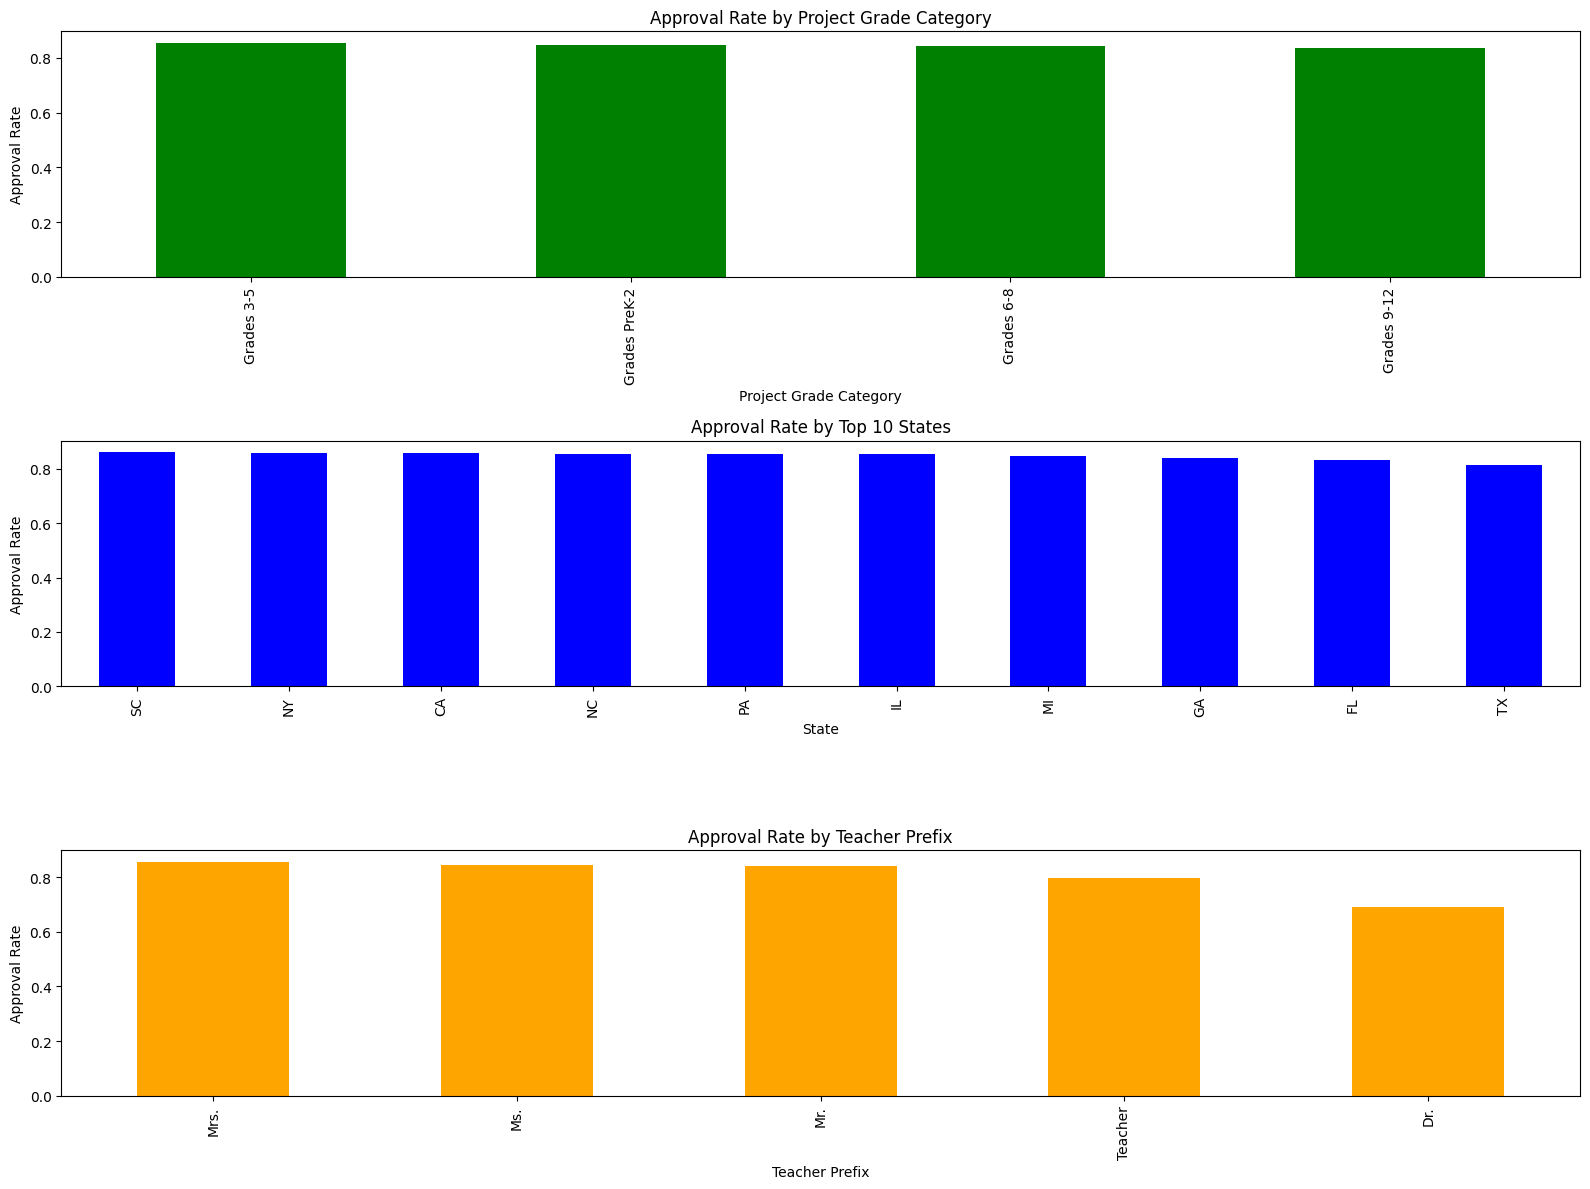

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_stats = project_data.describe(include='all')

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(project_data['total_quantity'], kde=True, color='blue')
plt.title('Distribution of Total Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(project_data['total_amount'], kde=True, color='purple')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(project_data['teacher_number_of_previously_posted_projects'], kde=True, color='orange')
plt.title('Distribution of Number of Previously Posted Projects')
plt.xlabel('Number of Previously Posted Projects')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.countplot(x='project_is_approved', data=project_data, palette='Set2')
plt.title('Distribution of Project Approval Status')
plt.xlabel('Project Approval Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

numeric_columns = project_data.select_dtypes(include=['number']).columns
correlation_matrix = project_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


grade_approval_rate = project_data.groupby('project_grade_category')['project_is_approved'].mean()

top_states = project_data['school_state'].value_counts().head(10).index
state_approval_rate = project_data[project_data['school_state'].isin(top_states)].groupby('school_state')['project_is_approved'].mean()

prefix_approval_rate = project_data.groupby('teacher_prefix')['project_is_approved'].mean()


plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
grade_approval_rate.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Approval Rate by Project Grade Category')
plt.xlabel('Project Grade Category')
plt.ylabel('Approval Rate')

plt.subplot(3, 1, 2)
state_approval_rate.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Approval Rate by Top 10 States')
plt.xlabel('State')
plt.ylabel('Approval Rate')

plt.subplot(3, 1, 3)
prefix_approval_rate.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Approval Rate by Teacher Prefix')
plt.xlabel('Teacher Prefix')
plt.ylabel('Approval Rate')

plt.tight_layout()
plt.show()

**Observations**

Document all the insights you get from EDA here

-
-
-

***Checklist***

Before proceeding further, check
- the overall approval rate is analyzed and visualized
- the approval rate is analyzed vs different other features both categorical and numeric
- if you created any new columns here for analysis, once again check the dataframe to inspect

<ipython-input-22-2ef539795f6d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=[1 - overall_approval_rate, overall_approval_rate], palette='Set2')


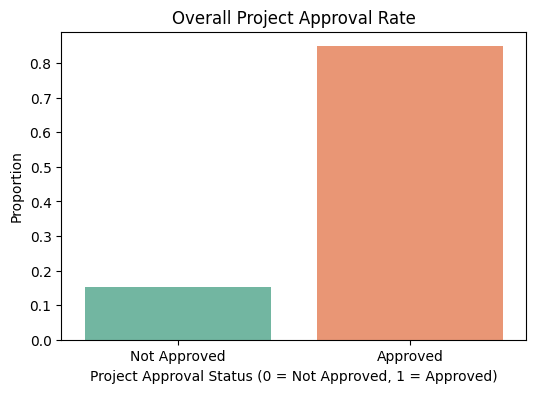

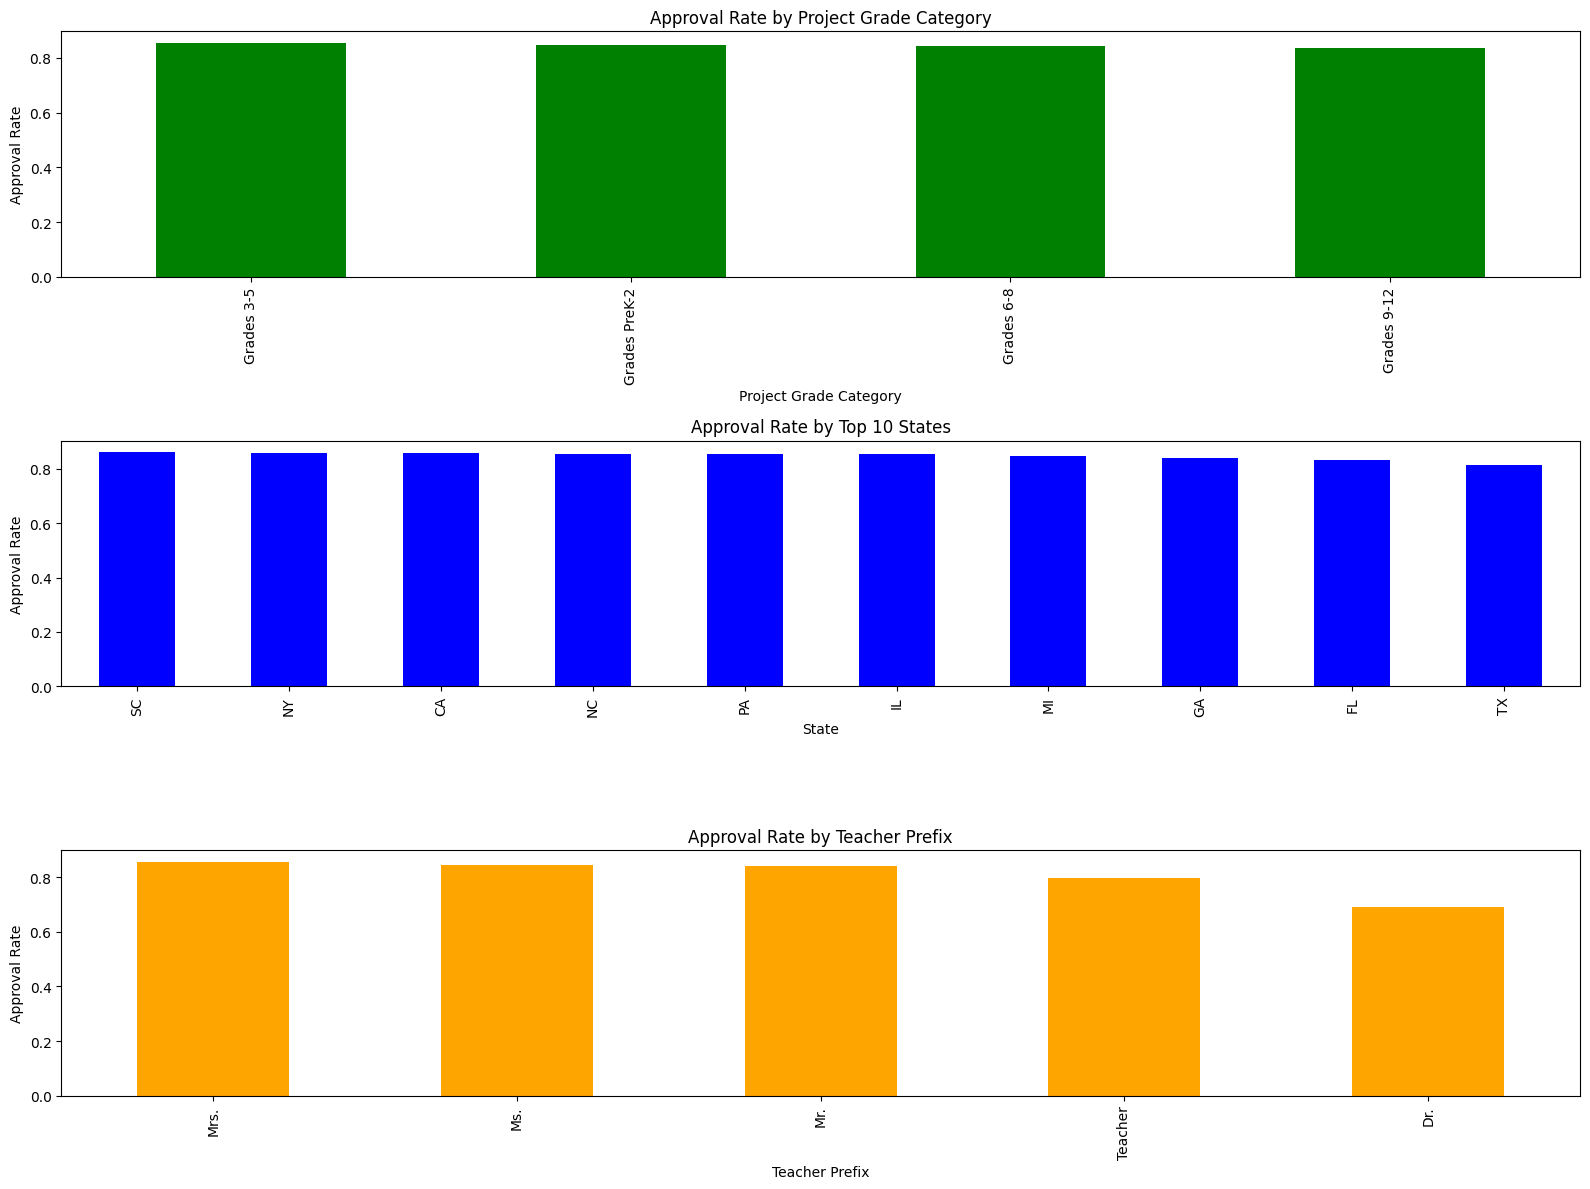

<ipython-input-22-2ef539795f6d>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_approval.values, y=correlation_with_approval.index, palette='coolwarm')


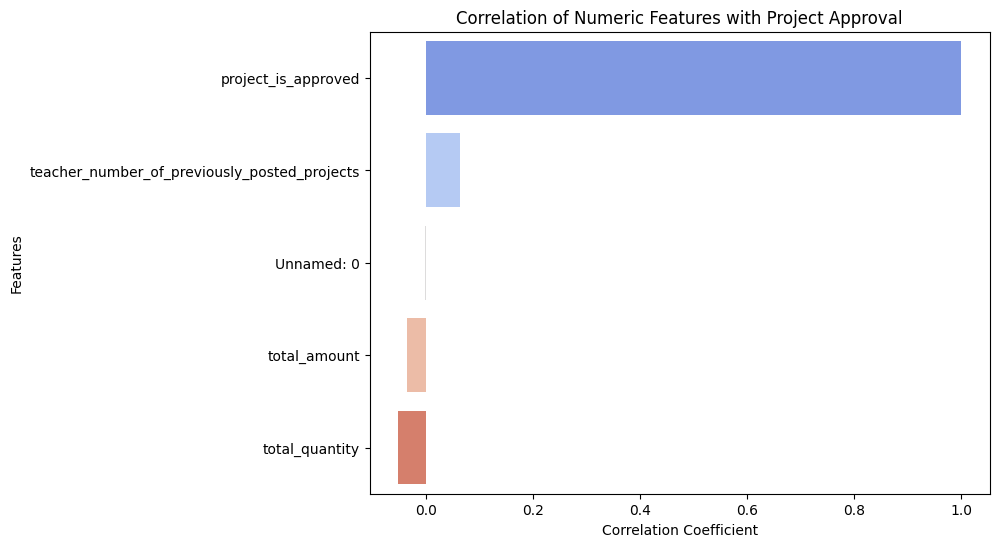

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    109248 non-null  int64  
 1   id                                            109248 non-null  object 
 2   teacher_id                                    109248 non-null  object 
 3   teacher_prefix                                109248 non-null  object 
 4   school_state                                  109248 non-null  object 
 5   project_submitted_datetime                    109248 non-null  object 
 6   project_grade_category                        109248 non-null  object 
 7   project_subject_categories                    109248 non-null  object 
 8   project_subject_subcategories                 109248 non-null  object 
 9   project_title                                 10

(None,
    Unnamed: 0       id                        teacher_id teacher_prefix  \
 0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
 1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
 2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
 3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
 4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
 
   school_state project_submitted_datetime project_grade_category  \
 0           IN        2016-12-05 13:43:57          Grades PreK-2   
 1           FL        2016-10-25 09:22:10             Grades 6-8   
 2           AZ        2016-08-31 12:03:56             Grades 6-8   
 3           KY        2016-10-06 21:16:17          Grades PreK-2   
 4           TX        2016-07-11 01:10:09          Grades PreK-2   
 
             project_subject_categories     project_subject_subcategories  \
 0                  Literacy & Language   

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

overall_approval_rate = project_data['project_is_approved'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=[0, 1], y=[1 - overall_approval_rate, overall_approval_rate], palette='Set2')
plt.title('Overall Project Approval Rate')
plt.xlabel('Project Approval Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()


grade_approval_rate = project_data.groupby('project_grade_category')['project_is_approved'].mean()

top_states = project_data['school_state'].value_counts().head(10).index
state_approval_rate = project_data[project_data['school_state'].isin(top_states)].groupby('school_state')['project_is_approved'].mean()

prefix_approval_rate = project_data.groupby('teacher_prefix')['project_is_approved'].mean()


plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
grade_approval_rate.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Approval Rate by Project Grade Category')
plt.xlabel('Project Grade Category')
plt.ylabel('Approval Rate')

plt.subplot(3, 1, 2)
state_approval_rate.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Approval Rate by Top 10 States')
plt.xlabel('State')
plt.ylabel('Approval Rate')

plt.subplot(3, 1, 3)
prefix_approval_rate.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Approval Rate by Teacher Prefix')
plt.xlabel('Teacher Prefix')
plt.ylabel('Approval Rate')

plt.tight_layout()
plt.show()


numeric_columns = project_data.select_dtypes(include=['number']).columns
correlation_with_approval = project_data[numeric_columns].corr()['project_is_approved'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_approval.values, y=correlation_with_approval.index, palette='coolwarm')
plt.title('Correlation of Numeric Features with Project Approval')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

project_data_info = project_data.info()
project_data_head = project_data.head()

project_data_info, project_data_head

With this the EDA section is now complete. Now, let's proceed to the next section on preparing the data for model building later

## Pre-Modelling Data Preparation

There are 5 steps to be done before we proceed to model building

- Handle the class imbalance in the data
- Text Pre-Processing for raw text columns
- Feature Encoding (One-hot encoding, etc.) for categorical columns
- Scaling (Standardization, Normalization, etc.) for numeric columns
- train-test-validation split

**Handling Class Imbalance**

As per the target variable distribution seen earlier, the datapoints for class "0" (not approved) is much low when compared with class "1" (approved).
This may lead to the model learning more than "1" class as compared to "0" class. Also the number of records are huge - 100k. You can follow these steps:

  - **Undersampling**: Reduce the data imbalance by selecting all instances from the minority class (class "0") and randomly selecting an equal number of instances from the majority class (class "1").

  - **Oversampling**: Increase the representation of the minority class by techniques like Random Oversampling or SMOTE to balance the dataset.

Choosing the appropriate method is crucial. It depends on various factors and the specific requirements of your model.As the number of columns would increase significantly once we start using text processing, it is imperative to take a pragmatic decision here.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = project_data.drop(columns=['project_is_approved'])  # Features (all columns except target)
y = project_data['project_is_approved']  # Target variable

categorical_columns = ['teacher_prefix', 'school_state', 'project_grade_category']  # example categorical columns
text_columns = ['project_essay_combined']  # example text columns
numeric_columns = ['total_quantity', 'total_amount', 'teacher_number_of_previously_posted_projects']  # example numeric columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_columns),
        ('text', TfidfVectorizer(max_features=500, stop_words='english'), 'project_essay_combined'),  # Reduced max_features
        ('num', 'passthrough', numeric_columns)
    ])

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

original_distribution = y_train.value_counts()
resampled_distribution = pd.Series(y_train_resampled).value_counts()


Original Distribution in Training Set:
 project_is_approved
1    74164
0    13234
Name: count, dtype: int64

Resampled Distribution After SMOTE:
 project_is_approved
0    74164
1    74164
Name: count, dtype: int64


In [ ]:

print("Original Distribution in Training Set:\n", original_distribution)
print("\nResampled Distribution After SMOTE:\n", resampled_distribution)

**Text-Processing**

There are two steps to be performed here

- Text Cleaning
- Conversion of text features to numeric features

***Text Cleaning***

Raw text often presents several challenges. Some of them include:

- **Noise and Irrelevant Information**: Raw text can include extraneous information that may not be useful for analysis or modeling.

- **Inconsistent Formatting**: Text data can vary in format, which makes it difficult to standardize and process.

- **Spelling and Grammar Errors**: Errors in spelling, grammar, and punctuation can affect the quality of text analysis and processing.

- **High Dimensionality**: Text data can be high-dimensional due to the large number of unique words or terms, complicating analysis and modeling.

- **Language Variability**: Variations in language usage, slang, or domain-specific terminology can impact the consistency and effectiveness of text analysis.


- Let's clean the text to improve the quality of data
  
  - Decontracting text, removing escape sequences, special characters and stop words

  - You can use two popular libraries to handle text data.
    1. Natural Language ToolKit (nltk)
    2. Regular Expressions (re)

To help you prepare your text for analysis, we have included some basic functions for cleaning and normalization. Use these functions as a starting point and tailor them to achieve optimal text quality.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def decontract_text(text):


    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    return text


def remove_escape_sequences(text):


    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\n', ' ')

    return text



def remove_special_characters(text):
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text


def remove_stop_words(text):

        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
        filtered_sentence = []
        for w in word_tokens:
                if w not in stop_words:
                        filtered_sentence.append(w)
        return filtered_sentence


def preprocess_text(text):

  text = decontract_text(text)
  text = remove_escape_sequences(text)
  text = remove_special_characters(text)
  text = remove_stop_words(text)

  text = ' '.join(text)

  return text.lower().strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def decontract_text(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def remove_escape_sequences(text):
    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\n', ' ')
    return text

def remove_special_characters(text):
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return filtered_sentence

def preprocess_text(text):
    text = decontract_text(text)
    text = remove_escape_sequences(text)
    text = remove_special_characters(text)
    text = remove_stop_words(text)
    text = ' '.join(text)
    return text.lower().strip()

project_data['project_essay_combined_clean'] = project_data['project_essay_combined'].apply(preprocess_text)

project_data[['project_essay_combined', 'project_essay_combined_clean']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,project_essay_combined,project_essay_combined_clean
0,My students are English learners that are work...,students english learners working english seco...
1,Our students arrive to our school eager to lea...,students arrive school eager learn polite gene...
2,"\r\n\""True champions aren't always the ones th...",true champions always ones win guts mia hamm q...
3,I work at a unique school filled with both ESL...,work unique school filled esl english second l...
4,Our second grade classroom next year will be m...,second grade classroom next year made around 2...


In [ ]:

project_data_cleaned_info = project_data[['project_essay_combined', 'project_essay_combined_clean']].info()
project_data_cleaned_head = project_data[['project_essay_combined', 'project_essay_combined_clean']].head()

project_data_cleaned_info, project_data_cleaned_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   project_essay_combined        109248 non-null  object
 1   project_essay_combined_clean  109248 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


(None,
                               project_essay_combined  \
 0  My students are English learners that are work...   
 1  Our students arrive to our school eager to lea...   
 2  \r\n\"True champions aren't always the ones th...   
 3  I work at a unique school filled with both ESL...   
 4  Our second grade classroom next year will be m...   
 
                         project_essay_combined_clean  
 0  students english learners working english seco...  
 1  students arrive school eager learn polite gene...  
 2  true champions always ones win guts mia hamm q...  
 3  work unique school filled esl english second l...  
 4  second grade classroom next year made around 2...  )

Feel free to exlore other Python libraries that can help you improve the text quality.

---

***Conversion of text features to numeric features***

- Machine Learning models can't work on plain English text. We need to convert this text into a structured format with numbers.

  - How can we turn text into numbers? This is where the Bag of Words method comes in. In BoW, each text feature (like a sentence or paragraph) is treated as a collection of words.
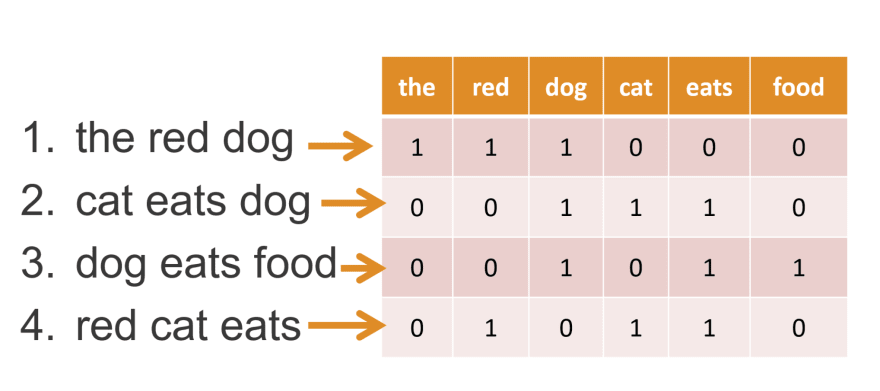

- **Creating the Vocabulary**:
  - The BoW model will first create a list of all unique words across all your text features.

- **Counting Word Frequencies**:
  - For each text feature, the BoW model counts the occurrences of each word from the vocabulary.

- **Building Feature Vectors**:
  - These word counts are then used to build feature vectors for each text feature, which can be used as input for your machine learning models.




In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

vectorizer = CountVectorizer()

In [ ]:

X_bow = vectorizer.fit_transform(project_data['project_essay_combined_clean'])


In [ ]:

bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

bow_df_info = bow_df.info()
bow_df_head = bow_df.head()

bow_df_info, bow_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Columns: 54731 entries, 00 to zzzzzzz
dtypes: int64(54731)
memory usage: 44.5 GB


(None,
    00  000  000s  001  002  003  005  00am  00p  00pm  ...  zumwalt  zundel  \
 0   0    0     0    0    0    0    0     0    0     0  ...        0       0   
 1   0    0     0    0    0    0    0     0    0     0  ...        0       0   
 2   0    0     0    0    0    0    0     0    0     0  ...        0       0   
 3   0    0     0    0    0    0    0     0    0     0  ...        0       0   
 4   0    0     0    0    0    0    0     0    0     0  ...        0       0   
 
    zuni  zusak  zwink  zx110  zydeco  zynergy  zz  zzzzzzz  
 0     0      0      0      0       0        0   0        0  
 1     0      0      0      0       0        0   0        0  
 2     0      0      0      0       0        0   0        0  
 3     0      0      0      0       0        0   0        0  
 4     0      0      0      0       0        0   0        0  
 
 [5 rows x 54731 columns])

Once you have performed the necessary steps, it's time to move to the feature encoding part

**Feature Encoding (One-hot encoding, etc.) for categorical columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

categorical_columns = ['teacher_prefix', 'school_state', 'project_grade_category']


label_encoding_columns = ['project_grade_category']  # example: assume 'project_grade_category' is ordinal
for col in label_encoding_columns:
    project_data[col + '_encoded'] = LabelEncoder().fit_transform(project_data[col])

one_hot_columns = ['school_state']  # example: assume 'school_state' is a nominal categorical feature
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(project_data[one_hot_columns])

one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

project_data = project_data.drop(columns=one_hot_columns)

project_data_encoded_df = pd.concat([project_data, one_hot_encoded_df], axis=1)

project_data_encoded_info = project_data_encoded_df.info()
project_data_encoded_head = project_data_encoded_df.head()

project_data_encoded_info, project_data_encoded_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 68 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    109248 non-null  int64  
 1   id                                            109248 non-null  object 
 2   teacher_id                                    109248 non-null  object 
 3   teacher_prefix                                109248 non-null  object 
 4   project_submitted_datetime                    109248 non-null  object 
 5   project_grade_category                        109248 non-null  object 
 6   project_subject_categories                    109248 non-null  object 
 7   project_subject_subcategories                 109248 non-null  object 
 8   project_title                                 109248 non-null  object 
 9   project_resource_summary                      10

(None,
    Unnamed: 0       id                        teacher_id teacher_prefix  \
 0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
 1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
 2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
 3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
 4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
 
   project_submitted_datetime project_grade_category  \
 0        2016-12-05 13:43:57          Grades PreK-2   
 1        2016-10-25 09:22:10             Grades 6-8   
 2        2016-08-31 12:03:56             Grades 6-8   
 3        2016-10-06 21:16:17          Grades PreK-2   
 4        2016-07-11 01:10:09          Grades PreK-2   
 
             project_subject_categories     project_subject_subcategories  \
 0                  Literacy & Language                     ESL, Literacy   
 1    History & Civics, Health & Sports  Ci

In [ ]:

project_data_encoded_info = project_data_encoded_df.info()
project_data_encoded_head = project_data_encoded_df.head()

project_data_encoded_info, project_data_encoded_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 68 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    109248 non-null  int64  
 1   id                                            109248 non-null  object 
 2   teacher_id                                    109248 non-null  object 
 3   teacher_prefix                                109248 non-null  object 
 4   project_submitted_datetime                    109248 non-null  object 
 5   project_grade_category                        109248 non-null  object 
 6   project_subject_categories                    109248 non-null  object 
 7   project_subject_subcategories                 109248 non-null  object 
 8   project_title                                 109248 non-null  object 
 9   project_resource_summary                      10

(None,
    Unnamed: 0       id                        teacher_id teacher_prefix  \
 0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
 1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
 2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
 3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
 4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
 
   project_submitted_datetime project_grade_category  \
 0        2016-12-05 13:43:57          Grades PreK-2   
 1        2016-10-25 09:22:10             Grades 6-8   
 2        2016-08-31 12:03:56             Grades 6-8   
 3        2016-10-06 21:16:17          Grades PreK-2   
 4        2016-07-11 01:10:09          Grades PreK-2   
 
             project_subject_categories     project_subject_subcategories  \
 0                  Literacy & Language                     ESL, Literacy   
 1    History & Civics, Health & Sports  Ci

Once you have performed the necessary steps, it's time to move to feature scaling part

**Scaling (Standardization, Normalization, etc.) for numeric columns**
- Before the ML modelling part, ensure all the numeric features are scaled properly

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

numeric_columns = ['total_quantity', 'total_amount', 'teacher_number_of_previously_posted_projects']


standard_scaler = StandardScaler()
project_data_encoded_df[numeric_columns] = standard_scaler.fit_transform(project_data_encoded_df[numeric_columns])


project_data_scaled_info = project_data_encoded_df.info()
project_data_scaled_head = project_data_encoded_df.head()

project_data_scaled_info, project_data_scaled_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 68 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    109248 non-null  int64  
 1   id                                            109248 non-null  object 
 2   teacher_id                                    109248 non-null  object 
 3   teacher_prefix                                109248 non-null  object 
 4   project_submitted_datetime                    109248 non-null  object 
 5   project_grade_category                        109248 non-null  object 
 6   project_subject_categories                    109248 non-null  object 
 7   project_subject_subcategories                 109248 non-null  object 
 8   project_title                                 109248 non-null  object 
 9   project_resource_summary                      10

(None,
    Unnamed: 0       id                        teacher_id teacher_prefix  \
 0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
 1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
 2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
 3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
 4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
 
   project_submitted_datetime project_grade_category  \
 0        2016-12-05 13:43:57          Grades PreK-2   
 1        2016-10-25 09:22:10             Grades 6-8   
 2        2016-08-31 12:03:56             Grades 6-8   
 3        2016-10-06 21:16:17          Grades PreK-2   
 4        2016-07-11 01:10:09          Grades PreK-2   
 
             project_subject_categories     project_subject_subcategories  \
 0                  Literacy & Language                     ESL, Literacy   
 1    History & Civics, Health & Sports  Ci

Once you have performed the necessary steps, let's combine all the features to create the X and y variables

**train-test-validation split**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy.sparse as sp


X = project_data_encoded_df.drop(columns=['project_is_approved']).values

y = project_data_encoded_df['project_is_approved'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train_shape = X_train.shape
X_val_shape = X_val.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_val_shape = y_val.shape
y_test_shape = y_test.shape

X_train_shape, X_val_shape, X_test_shape, y_train_shape, y_val_shape, y_test_shape

((69918, 67), (17480, 67), (21850, 67), (69918,), (17480,), (21850,))

Let's split the combined dataframe into the following partitions: `train`, `validation`, and `test`.

In [ ]:

from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train_shape = X_train.shape
X_val_shape = X_val.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_val_shape = y_val.shape
y_test_shape = y_test.shape

X_train_shape, X_val_shape, X_test_shape, y_train_shape, y_val_shape, y_test_shape

((87398, 67), (10925, 67), (10925, 67), (87398,), (10925,), (10925,))

Once the train-test-validation split is done, it's time to move on to the model building part

## Model Building

Note - Model Building and Model Evaluation sometimes happen together for identifying the best models. Hence then next two sections can be considered as a single large section and you can complete them together

Your goal is to build a classification model that is able to identify which projects get approved. For this, build at least 2 classifcation models to compare and contrast

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


non_numeric_columns = project_data_encoded_df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns.tolist())

project_data_encoded_df = project_data_encoded_df.drop(columns=non_numeric_columns)

X = project_data_encoded_df.drop(columns=['project_is_approved']).values
y = project_data_encoded_df['project_is_approved'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_val_pred_log_reg = log_reg.predict(X_val)

log_reg_accuracy = accuracy_score(y_val, y_val_pred_log_reg)
log_reg_confusion = confusion_matrix(y_val, y_val_pred_log_reg)
log_reg_classification_report = classification_report(y_val, y_val_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Confusion Matrix:\n", log_reg_confusion)
print("Classification Report:\n", log_reg_classification_report)

Non-numeric columns: ['id', 'teacher_id', 'teacher_prefix', 'project_submitted_datetime', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_resource_summary', 'project_essay_combined', 'project_essay_combined_clean']
Logistic Regression Accuracy: 0.8485697940503433
Confusion Matrix:
 [[    0  2647]
 [    0 14833]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2647
           1       0.85      1.00      0.92     14833

    accuracy                           0.85     17480
   macro avg       0.42      0.50      0.46     17480
weighted avg       0.72      0.85      0.78     17480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = random_search.best_estimator_

y_val_pred_best_rf = best_rf_model.predict(X_val)

best_rf_accuracy = accuracy_score(y_val, y_val_pred_best_rf)
best_rf_confusion = confusion_matrix(y_val, y_val_pred_best_rf)
best_rf_classification_report = classification_report(y_val, y_val_pred_best_rf)

print("Best Random Forest Accuracy:", best_rf_accuracy)
print("Confusion Matrix:\n", best_rf_confusion)
print("Classification Report:\n", best_rf_classification_report)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
Best Random Forest Accuracy: 0.8485697940503433
Confusion Matrix:
 [[    0  2647]
 [    0 14833]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2647
           1       0.85      1.00      0.92     14833

    accuracy                           0.85     17480
   macro avg       0.42      0.50      0.46     17480
weighted avg       0.72      0.85      0.78     17480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_gb_model = random_search.best_estimator_

y_val_pred_best_gb = best_gb_model.predict(X_val)

best_gb_accuracy = accuracy_score(y_val, y_val_pred_best_gb)
best_gb_confusion = confusion_matrix(y_val, y_val_pred_best_gb)
best_gb_classification_report = classification_report(y_val, y_val_pred_best_gb)

print("Best Gradient Boosting Accuracy:", best_gb_accuracy)
print("Confusion Matrix:\n", best_gb_confusion)
print("Classification Report:\n", best_gb_classification_report)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}
Best Gradient Boosting Accuracy: 0.8485697940503433
Confusion Matrix:
 [[    0  2647]
 [    0 14833]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2647
           1       0.85      1.00      0.92     14833

    accuracy                           0.85     17480
   macro avg       0.42      0.50      0.46     17480
weighted avg       0.72      0.85      0.78     17480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

Evaluate the above models based on the various evaluation metrics like accuracy, precision, recall, F1-score, etc.

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test_pred = best_gb_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_confusion)
print("Classification Report:\n", test_classification_report)

Test Accuracy: 0.848604118993135
Confusion Matrix:
 [[    0  3308]
 [    0 18542]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3308
           1       0.85      1.00      0.92     18542

    accuracy                           0.85     21850
   macro avg       0.42      0.50      0.46     21850
weighted avg       0.72      0.85      0.78     21850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


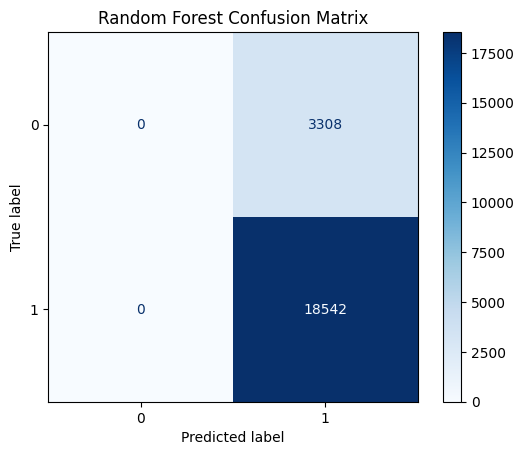

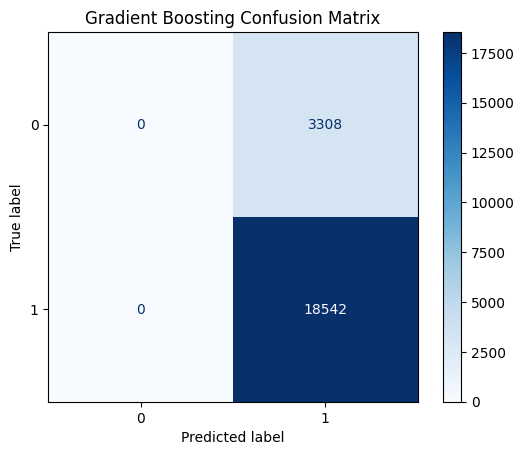

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred_rf = best_rf_model.predict(X_test)

y_test_pred_gb = best_gb_model.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=[0, 1])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb, display_labels=[0, 1])
disp_gb.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

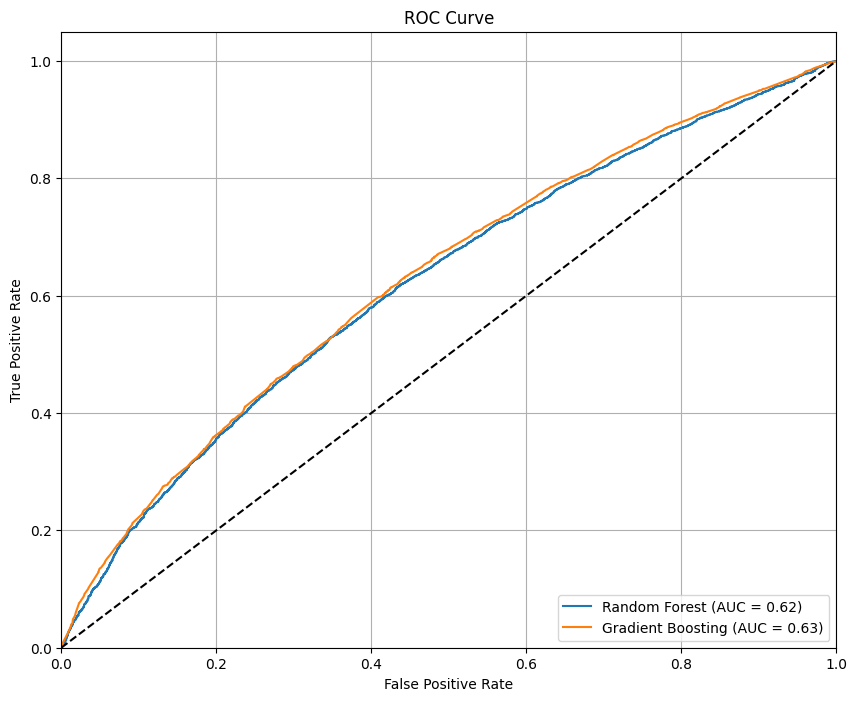

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_test_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_prob_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_test_prob_gb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import classification_report

y_test_pred_rf = best_rf_model.predict(X_test)

y_test_pred_gb = best_gb_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_test_pred_gb))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3308
           1       0.85      1.00      0.92     18542

    accuracy                           0.85     21850
   macro avg       0.42      0.50      0.46     21850
weighted avg       0.72      0.85      0.78     21850

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3308
           1       0.85      1.00      0.92     18542

    accuracy                           0.85     21850
   macro avg       0.42      0.50      0.46     21850
weighted avg       0.72      0.85      0.78     21850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

base_estimator = DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=100,  # Number of trees
    random_state=42,
    n_jobs=-1  # Use all cores
)

bagging_model.fit(X_train, y_train)

y_test_pred_bagging = bagging_model.predict(X_test)

bagging_accuracy = accuracy_score(y_test, y_test_pred_bagging)
bagging_confusion = confusion_matrix(y_test, y_test_pred_bagging)
bagging_classification_report = classification_report(y_test, y_test_pred_bagging)

print("Bagging Accuracy:", bagging_accuracy)
print("Bagging Confusion Matrix:\n", bagging_confusion)
print("Bagging Classification Report:\n", bagging_classification_report)


from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_test_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_test_pred_xgb)
xgb_confusion = confusion_matrix(y_test, y_test_pred_xgb)
xgb_classification_report = classification_report(y_test, y_test_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_confusion)
print("XGBoost Classification Report:\n", xgb_classification_report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8430663615560641
Bagging Confusion Matrix:
 [[   48  3260]
 [  169 18373]]
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.01      0.03      3308
           1       0.85      0.99      0.91     18542

    accuracy                           0.84     21850
   macro avg       0.54      0.50      0.47     21850
weighted avg       0.75      0.84      0.78     21850



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:29:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.848604118993135
XGBoost Confusion Matrix:
 [[    0  3308]
 [    0 18542]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3308
           1       0.85      1.00      0.92     18542

    accuracy                           0.85     21850
   macro avg       0.42      0.50      0.46     21850
weighted avg       0.72      0.85      0.78     21850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observations**

*Document your observations regarding the different models that you have built, and their evaluation metrics*

-
-
-

***Checklist***

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 60-70%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Good work completing all the steps till now!

Now, go ahead and summarize your entire work and findings below:

-
-
-

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.

---



### **Future Improvements**
- **[Optional: Bayesian Optimization]** Leverage Optuna or hyperopt or scikit-optimize for hyperparameter optimization.
- **[Optional: Imbalanced Classification]** Use imbalanced-learn (*imblearn*) for handling skewed datasets. You can try class weighting.
- **[Optional: NLP Concepts]** If you have time, consider exploring concepts like Term Frequency Inverse Document Frequency (TF-IDF), Stemming, Lemmatization, and Text (Document/Paragraph/Sentence) Embeddings. These topics will be covered in the upcoming Natural Language Processing (NLP) modules.




---

